In [1]:
### HALO index clustering - python-only pipeline



In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mythical code button"></form>''')

In [3]:
import scipy
import netCDF4 as nc
import numpy as np
import pickle
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import sys
sys.path.append('../extraction_scripts')
sys.path.append('..')
import map_fxn as mf
from importlib import reload

import cmocean as cm
import pipvis as vp
reload(vp)



import sys
sys.path.append('../extraction_scripts')
sys.path.append('..')
import map_fxn as mf
reload(vp)


<module 'pipvis' from '../pipvis.py'>

## masking edges

In [4]:
bath = '/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
grid = mf.import_bathy(bath)
fmask = (grid.fmask[0,0,:,:]) 

stn_x, stn_y = mf.make_stns(10)
d_stn_x, d_stn_y = mf.filter_stn_in_domain(stn_x,stn_y,fmask)

d_stn_xar = np.array(d_stn_x)
d_stn_yar = np.array(d_stn_y)

edge = np.where((d_stn_xar<=10) | (d_stn_yar>=888))
np.squeeze(edge)
np.shape(edge)
edgear = np.array(edge)
edgear = edgear[0]

d_stn_xar =np.delete(d_stn_xar,edge)
d_stn_yar = np.delete(d_stn_yar,edge)

print(np.size(d_stn_xar))


571



#### agglomerate signals extracted and save as .pkl, for year in 2013-2016

In [5]:
# do this for years 2013  to 2016
years = ['2013','2014','2015','2016']

for year in years:
    if year == '2016':
        noday = 366
    if year != '2016':
        noday = 365
        
    print(year)
    basedir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/NC_HINDCAST/'


    varfolder = 'HALO_TS'
    tname = '../pkls/halo_datamat_'+year+'.pkl'
    signalmat = np.zeros([np.size(d_stn_xar),noday])
    count = 0 
    for i in range(0,580):
        
        if i not in edgear:

            pattern  = f'stn_{i}halo_depth_sp10.nc'
            tdat = nc.Dataset(basedir+year +'/'+ varfolder +'/'+pattern)
            signalmat[count,:] = tdat['halocline_depth'][:]
            count = count+1

    pickle.dump(signalmat, open(tname, 'wb'))


2013
2014
2015
2016


## open the resulting signalmats, cluster from 2-N (N=100) clusters, save linkage matrix and cluster matrices, visualise dendrograms

In [6]:
for year in years:
    print(year)
    signalmat = pickle.load(open('../pkls/halo_datamat_'+year+'.pkl', 'rb'))

    Z = linkage(signalmat, 'ward')
    pickle.dump(Z, open('../pkls/halo_linkmat_'+year+'.pkl', 'wb'))
    
    clustermat = np.zeros([100,np.size(d_stn_xar)])                           
    for k in range(0,100): 
        clustermat[k,:] = fcluster(Z, k+1, criterion='maxclust')
    pickle.dump(clustermat, open('../pkls/halo_clustmat_'+year+'.pkl', 'wb'))

2013
2014
2015
2016


#### 'objective' measures of clustering are sometimes hard to defend

##### one way to circumvent this obvious problem is to look manually at the visual clusters provided


## 2013

FileNotFoundError: [Errno 2] No such file or directory: './pkls/bio_clustmat_2013.pkl'

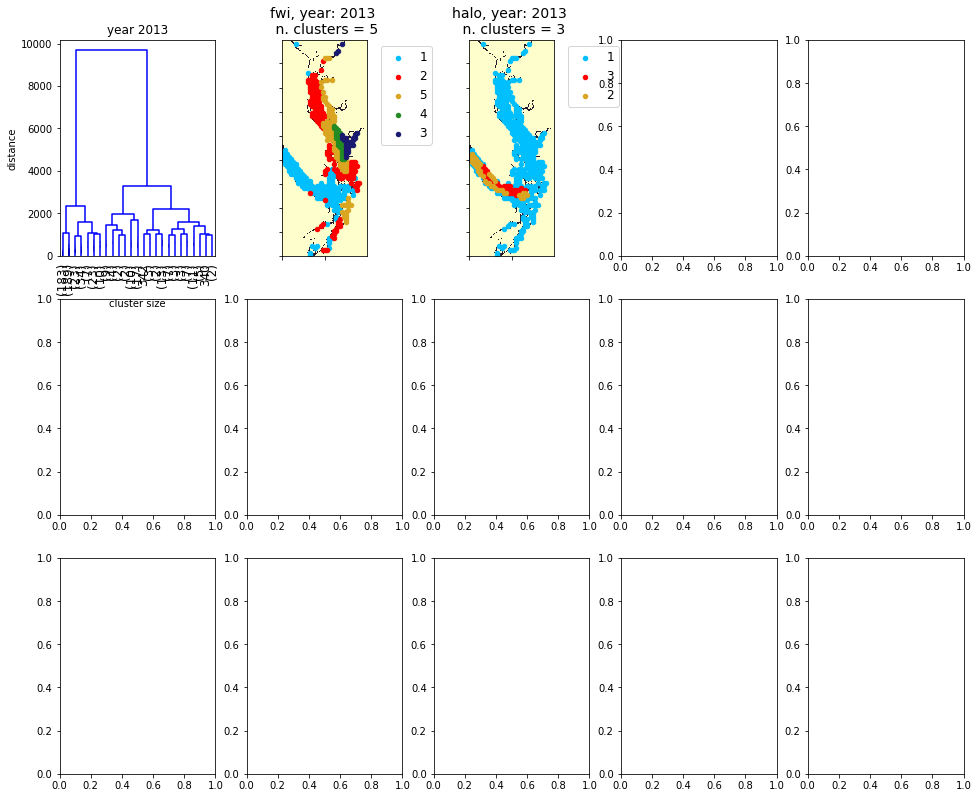

In [9]:
reload(vp)

fact = 0.9

#fig = plt.figure(figsize=(15*fact, 15*fact))
fig, axs = plt.subplots(3,5,figsize=(18*fact,15*fact))

plt.subplot(3,5,1)
Z = pickle.load(open('../pkls/halo_linkmat_2013.pkl', 'rb'))
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    color_threshold = 0,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('year 2013'); plt.xlabel('cluster size'); plt.ylabel('distance')


vp.clusters(axs[0,1],'2013','fwi',5)
vp.clusters(axs[0,2],'2013','halo',3)
vp.clusters(axs[0,3],'2013','bio',4)

plt.tight_layout()



## 2014

In [ ]:
reload(vp)

fact = 0.9

#fig = plt.figure(figsize=(15*fact, 15*fact))
fig, axs = plt.subplots(3,5,figsize=(18*fact,15*fact))

plt.subplot(3,5,1)
Z = pickle.load(open('../pkls/halo_linkmat_2014.pkl', 'rb'))
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    color_threshold = 0,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('year 2014'); plt.xlabel('cluster size'); plt.ylabel('distance')


vp.clusters(axs[0,1],'2014','halo',2)
vp.clusters(axs[0,2],'2014','halo',3)
vp.clusters(axs[0,3],'2014','halo',4)
vp.clusters(axs[0,4],'2014','halo',5)

vp.clusters(axs[1,0],'2014','halo',6)
vp.clusters(axs[1,1],'2014','halo',7)
vp.clusters(axs[1,2],'2014','halo',8)
vp.clusters(axs[1,3],'2014','halo',9)
vp.clusters(axs[1,4],'2014','halo',10)

vp.clusters(axs[2,0],'2014','halo',11)
vp.clusters(axs[2,1],'2014','halo',12)
vp.clusters(axs[2,2],'2014','halo',13)
vp.clusters(axs[2,3],'2014','halo',14)
vp.clusters(axs[2,4],'2014','halo',15)

plt.tight_layout()



## 2015 

In [ ]:
reload(vp)

fact = 0.9

#fig = plt.figure(figsize=(15*fact, 15*fact))
fig, axs = plt.subplots(3,5,figsize=(18*fact,15*fact))

plt.subplot(3,5,1)
Z = pickle.load(open('../pkls/halo_linkmat_2015.pkl', 'rb'))
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    color_threshold = 0,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('year 2015'); plt.xlabel('cluster size'); plt.ylabel('distance')


vp.clusters(axs[0,1],'2015','halo',2)
vp.clusters(axs[0,2],'2015','halo',3)
vp.clusters(axs[0,3],'2015','halo',4)
vp.clusters(axs[0,4],'2015','halo',5)

vp.clusters(axs[1,0],'2015','halo',6)
vp.clusters(axs[1,1],'2015','halo',7)
vp.clusters(axs[1,2],'2015','halo',8)
vp.clusters(axs[1,3],'2015','halo',9)
vp.clusters(axs[1,4],'2015','halo',10)

vp.clusters(axs[2,0],'2015','halo',11)
vp.clusters(axs[2,1],'2015','halo',12)
vp.clusters(axs[2,2],'2015','halo',13)
vp.clusters(axs[2,3],'2015','halo',14)
vp.clusters(axs[2,4],'2015','halo',15)

plt.tight_layout()



## 2016

In [ ]:
reload(vp)

fact = 0.9

#fig = plt.figure(figsize=(15*fact, 15*fact))
fig, axs = plt.subplots(3,5,figsize=(18*fact,15*fact))

plt.subplot(3,5,1)
Z = pickle.load(open('../pkls/halo_linkmat_2016.pkl', 'rb'))
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    color_threshold = 0,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('year 2016'); plt.xlabel('cluster size'); plt.ylabel('distance')


vp.clusters(axs[0,1],'2016','halo',2)
vp.clusters(axs[0,2],'2016','halo',3)
vp.clusters(axs[0,3],'2016','halo',4)
vp.clusters(axs[0,4],'2016','halo',5)

vp.clusters(axs[1,0],'2016','halo',6)
vp.clusters(axs[1,1],'2016','halo',7)
vp.clusters(axs[1,2],'2016','halo',8)
vp.clusters(axs[1,3],'2016','halo',9)
vp.clusters(axs[1,4],'2016','halo',10)

vp.clusters(axs[2,0],'2016','halo',11)
vp.clusters(axs[2,1],'2016','halo',12)
vp.clusters(axs[2,2],'2016','halo',13)
vp.clusters(axs[2,3],'2016','halo',14)
vp.clusters(axs[2,4],'2016','halo',15)

plt.tight_layout()



#### 

In [ ]:
cl_2013 = pickle.load(open('../pkls/halo_clustmat_2013.pkl', 'rb'))
cl_2014 = pickle.load(open('../pkls/halo_clustmat_2014.pkl', 'rb'))
cl_2015 = pickle.load(open('../pkls/halo_clustmat_2015.pkl', 'rb'))
cl_2016 = pickle.load(open('../pkls/halo_clustmat_2016.pkl', 'rb'))
sig_2013 = pickle.load(open('../pkls/halo_datamat_2013.pkl', 'rb'))
sig_2014 = pickle.load(open('../pkls/halo_datamat_2014.pkl', 'rb'))
sig_2015 = pickle.load(open('../pkls/halo_datamat_2015.pkl', 'rb'))
sig_2016 = pickle.load(open('../pkls/halo_datamat_2016.pkl', 'rb'))


## visualize original clusterings by size and do manual relabeling

In [ ]:
fact = 0.6
fig, axs = plt.subplots(1,4,figsize=(18*fact,15*fact))

vp.clusters(axs[0],'2013','halo',5)
vp.clusters(axs[1],'2014','halo',5)
vp.clusters(axs[2],'2015','halo',5)
vp.clusters(axs[3],'2016','halo',5)

var = 'halo'
year = 2013
tpkl = f'../pkls/{var}_clustmat_{year}.pkl'  
cl = pickle.load(open(tpkl, 'rb'))
no_clusters = 5    
cl_this = cl[no_clusters-1,:]
cldes_2013_reass = np.zeros_like(cl_this)
cldes_2013_reass[cl_this == 3] = 1
cldes_2013_reass[cl_this == 4] = 2
cldes_2013_reass[cl_this == 1] = 3
cldes_2013_reass[cl_this == 2] = 4
cldes_2013_reass[cl_this == 5] = 5

year = 2014
tpkl = f'../pkls/{var}_clustmat_{year}.pkl'  
cl = pickle.load(open(tpkl, 'rb'))
no_clusters = 5    
cl_this = cl[no_clusters-1,:]
cldes_2014_reass = np.zeros_like(cl_this)
cldes_2014_reass[cl_this == 3] = 1
cldes_2014_reass[cl_this == 5] = 2
cldes_2014_reass[cl_this == 1] = 3
cldes_2014_reass[cl_this == 2] = 4
cldes_2014_reass[cl_this == 4] = 5

year = 2015
tpkl = f'../pkls/{var}_clustmat_{year}.pkl'  
cl = pickle.load(open(tpkl, 'rb'))
no_clusters = 5    
cl_this = cl[no_clusters-1,:]
cldes_2015_reass = np.zeros_like(cl_this)
cldes_2015_reass[cl_this == 3] = 1
cldes_2015_reass[cl_this == 4] = 2
cldes_2015_reass[cl_this == 1] = 3
cldes_2015_reass[cl_this == 2] = 4
cldes_2015_reass[cl_this == 5] = 5

year = 2016
tpkl = f'../pkls/{var}_clustmat_{year}.pkl'  
cl = pickle.load(open(tpkl, 'rb'))
no_clusters = 5    
cl_this = cl[no_clusters-1,:]
cldes_2016_reass = np.zeros_like(cl_this)
cldes_2016_reass[cl_this == 4] = 1
cldes_2016_reass[cl_this == 5] = 2
cldes_2016_reass[cl_this == 2] = 3
cldes_2016_reass[cl_this == 3] = 4
cldes_2016_reass[cl_this == 1] = 5




## chceck that reassigning worked

In [ ]:
colors = ['white',
          'goldenrod',
          'forestgreen',
          'deepskyblue',
          'red',
          'midnightblue',
          'deepskyblue','gray','peru',
'olive','sandybrown','teal','pink','tan',
'yellow','thistle']
    
reload(vp)
fig, axs = plt.subplots(1,4,figsize=(18*fact,15*fact))

vp.clusters_basic(axs[0],'2013','halo',5,cldes_2013_reass, colors)
vp.clusters_basic(axs[1],'2014','halo',5,cldes_2014_reass, colors)
vp.clusters_basic(axs[2],'2015','halo',5,cldes_2015_reass, colors)
vp.clusters_basic(axs[3],'2016','halo',5,cldes_2016_reass, colors)

In [ ]:
import cluster_fxn as cf

no_clust = 5

fact = 0.8
fig, axs = plt.subplots(5,1,figsize=(10*fact,10*fact))

#blues
linestyl = ['-',':','-.','--']
sigmats = [sig_2013,sig_2014,sig_2015,sig_2016]
clustmats = [cldes_2013_reass,cldes_2014_reass,cldes_2015_reass,cldes_2016_reass]
clustnos = [5,5,5,5]
nodays =  [365,365,365,366]
labs = ['2013','2014','2015','2016']

clustdes = [1,1,1,1]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    axs[0].plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[1],\
                linestyle = linestyl[i], label = labs[i])
axs[0].set_xlim([0,365])
axs[0].legend(loc = 'best', ncol = 2)

clustdes = [2,2,2,2]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    axs[1].plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[2],\
                linestyle = linestyl[i], label = labs[i])
axs[1].set_xlim([0,365])

clustdes = [3,3,3,3]

for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    axs[2].plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[3],\
                linestyle = linestyl[i], label = labs[i])
axs[2].set_xlim([0,365])

clustdes = [4,4,4,4]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    axs[3].plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[4],\
                linestyle = linestyl[i], label = labs[i])
axs[3].set_xlim([0,365])

clustdes = [5,5,5,5]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    axs[4].plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[5],\
                linestyle = linestyl[i], label = labs[i])
axs[4].set_xlim([0,365])

for i in range(0,5):
    axs[i].set_ylim([0,125])
    axs[i].set_ylabel('Freshwater \n Index')
    axs[i].set_xticks([])
w = axs[4].set_xticks(np.arange(0,390,30))
w = axs[4].set_xlabel('days of year')

In [ ]:
def clusters_basic(ax1,year,var,noclust,cl_this, colors, legend = True, markersize = 20, legfontsize = 12 ):
    
    import pickle
    import numpy as np
    import cmocean as cm
    import sys
    sys.path.append('./extraction_scripts')
    import map_fxn as mf
    from salishsea_tools import (
    viz_tools)
    
    bath = '/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
    grid = mf.import_bathy(bath)
    tpkl = f'./pkls/{var}_clustmat_{year}.pkl'
    cl = pickle.load(open(tpkl, 'rb'))

    viz_tools.set_aspect(ax1)   
    fmask = (grid.fmask[0,0,:,:])    
    mesh = ax1.pcolormesh(fmask, vmin=0, vmax=1, cmap = cm.cm.deep)

    ax1.set_ylim([0,898])
    ax1.set_xlim([0,398])

    stn_x, stn_y = mf.make_stns(10)
    d_stn_x, d_stn_y = mf.filter_stn_in_domain(stn_x,stn_y,fmask)

    d_stn_xar = np.array(d_stn_x)
    d_stn_yar = np.array(d_stn_y)

    edge = np.where((d_stn_xar<=10) | (d_stn_yar>=888))
    np.squeeze(edge)
    np.shape(edge)
    edgear = np.array(edge)
    edgear = edgear[0]

    d_stn_xar =np.delete(d_stn_xar,edge)
    d_stn_yar = np.delete(d_stn_yar,edge)

    for j in range(1,noclust+1):

        cluster = np.where(cl_this == j)
        cluster = np.squeeze(cluster)
        
        
        c1_x = np.take(d_stn_xar,cluster)
        c1_y = np.take(d_stn_yar,cluster)
        pts = ax1.scatter(c1_x,c1_y,s=markersize,c=colors[j], label=str(j), marker='o')
        ax1.set_xticklabels( () ) 
        ax1.set_yticklabels( () ) 
    
    tit = var + ', year: ' + year + ' \n n. clusters = '+ str(noclust)
    if legend:
        ax1.legend(bbox_to_anchor=(1.1, 1), fontsize = legfontsize)
    ax1.set_title(tit,fontsize = legfontsize + 2)

In [ ]:
linestyl = ['-',':','-.','--']
sigmats = [sig_2013,sig_2014,sig_2015,sig_2016]
clustmats = [cldes_2013_reass,cldes_2014_reass,cldes_2015_reass,cldes_2016_reass]
clustnos = [5,5,5,5]
nodays =  [365,365,365,366]
labs = ['2013','2014','2015','2016']



fact = 2
fig = plt.figure(figsize=(7*fact, 7*fact))

ax1 = plt.subplot2grid((7,4), (0,0), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2013','halo',5,cldes_2013_reass, colors)
ax1 = plt.subplot2grid((7,4), (0,1), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2014','halo',5,cldes_2014_reass, colors)
ax1 = plt.subplot2grid((7,4), (0,2), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2015','halo',5,cldes_2015_reass, colors)
ax1 = plt.subplot2grid((7,4), (0,3), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2016','halo',5,cldes_2016_reass, colors)

ax1 = plt.subplot2grid((7,4), (4,0), colspan=2, rowspan=1)
clustdes = [1,1,1,1]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[1],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365])
ax1.set_ylim([0,125])
ax1.legend(loc = 'best', ncol = 2)

ax1 = plt.subplot2grid((7,4), (4,2), colspan=2, rowspan=1) 
clustdes = [2,2,2,2]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[2],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365])
ax1.set_ylim([0,125])
ax1.legend(loc = 'best', ncol = 2)

ax1 = plt.subplot2grid((7,4), (5,0), colspan=2, rowspan=1) 
clustdes = [3,3,3,3]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[3],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365])
ax1.set_ylim([0,125])

ax1 = plt.subplot2grid((7,4), (5,2), colspan=2, rowspan=1) 
clustdes = [4,4,4,4]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[4],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365])
ax1.set_ylim([0,125])

ax1 = plt.subplot2grid((7,4), (6,0), colspan=2, rowspan=1) 
clustdes = [5,5,5,5]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[5],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365])
ax1.set_ylim([0,125])
# ax1 = plt.subplot2grid((7,4), (6,2), colspan=2, rowspan=1) 
# ax1.set_xticks([])
# ax1.set_yticks([])

plt.tight_layout()



fig.savefig('./paper_figs/MF04_halocline_clustering.pdf', bbox_inches='tight')


